(303, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    i

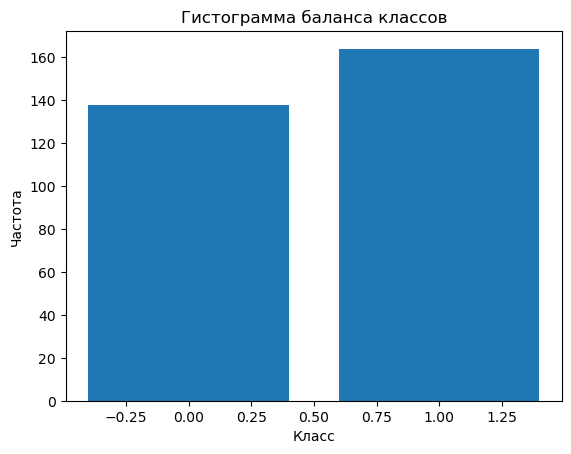

Матрица ошибок для логистической регрессии:
[[24  5]
 [ 4 28]]
Матрица ошибок для метода опорных векторов (SVM):
[[16 13]
 [ 5 27]]
Матрица ошибок для метода ближайших соседей (KNN):
[[16 13]
 [ 8 24]]


C:\Users\naspo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


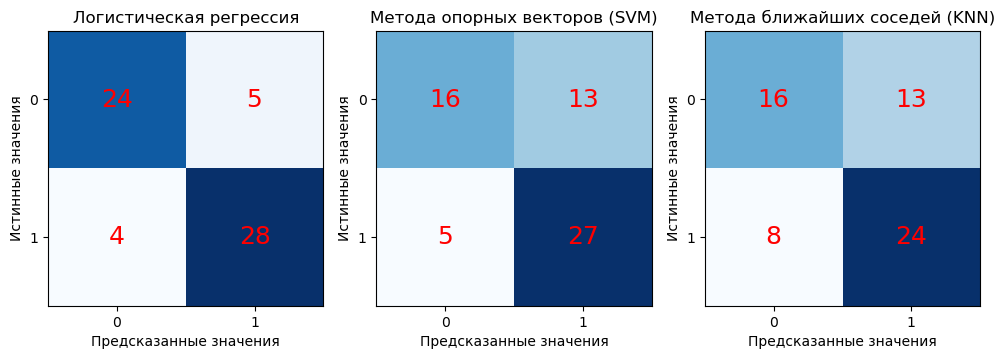

Отчет для логистической регрессии:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Отчет для метода опорных векторов (SVM):
              precision    recall  f1-score   support

           0       0.76      0.55      0.64        29
           1       0.68      0.84      0.75        32

    accuracy                           0.70        61
   macro avg       0.72      0.70      0.70        61
weighted avg       0.72      0.70      0.70        61

Отчет для метода ближайших соседей (KNN):
              precision    recall  f1-score   support

           0       0.67      0.55      0.60        29
           1       0.65      0.75      0.70        32

    accuracy                           0.66        61
   macro a

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# 1: Загрузка данных
data = pd.read_csv("heart.csv")

# 1.1: Изучение данных
# Размерность датасета
print(data.shape)
# Просмотр первых нескольких строк
print(data.head())
# Информация о типах данных и наличии пропущенных значений
print(data.info())

# 1.2: Предобработка данных
# Удаление строк с пропущенными значениями
data.dropna(inplace=True)

# Удаление повторяющихся строк
data.drop_duplicates(inplace=True)

# 2: Изобразить гистограмму, показывающую баланс классов
class_counts = data['target'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Класс')
plt.ylabel('Частота')
plt.title('Гистограмма баланса классов')
plt.show()

# 3: Разбить выборку на тренировочную и тестовую
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 4: Применить алгоритмы классификации и построить матрицы ошибок
logreg_model = LogisticRegression()
svm_model = SVC()
knn_model = KNeighborsClassifier()

logreg_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

logreg_preds = logreg_model.predict(X_test)
svm_preds = svm_model.predict(X_test)
knn_preds = knn_model.predict(X_test)

logreg_cm = confusion_matrix(y_test, logreg_preds)
svm_cm = confusion_matrix(y_test, svm_preds)
knn_cm = confusion_matrix(y_test, knn_preds)

# Построение матрицы ошибок
logreg_cm = confusion_matrix(y_test, logreg_preds)
svm_cm = confusion_matrix(y_test, svm_preds)
knn_cm = confusion_matrix(y_test, knn_preds)

print("Матрица ошибок для логистической регрессии:")
print(logreg_cm)
print("Матрица ошибок для метода опорных векторов (SVM):")
print(svm_cm)
print("Матрица ошибок для метода ближайших соседей (KNN):")
print(knn_cm)

# Визуализация матриц ошибок
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(logreg_cm, cmap=plt.cm.Blues)
plt.title("Логистическая регрессия")
plt.xlabel("Предсказанные значения")
plt.ylabel("Истинные значения")
plt.xticks([0, 1])
plt.yticks([0, 1])
for i in range(logreg_cm.shape[0]):
    for j in range(logreg_cm.shape[1]):
        plt.text(j, i, logreg_cm[i, j], ha='center', va='center', color='red', fontsize=18)

plt.subplot(1, 3, 2)
plt.imshow(svm_cm, cmap=plt.cm.Blues)
plt.title("Метода опорных векторов (SVM)")
plt.xlabel("Предсказанные значения")
plt.ylabel("Истинные значения")
plt.xticks([0, 1])
plt.yticks([0, 1])
for i in range(svm_cm.shape[0]):
    for j in range(svm_cm.shape[1]):
        plt.text(j, i, svm_cm[i, j], ha='center', va='center', color='red', fontsize=18)
        
plt.subplot(1, 3, 3)
plt.imshow(knn_cm, cmap=plt.cm.Blues)
plt.title("Метода ближайших соседей (KNN)")
plt.xlabel("Предсказанные значения")
plt.ylabel("Истинные значения")
plt.xticks([0, 1])
plt.yticks([0, 1])
for i in range(knn_cm.shape[0]):
    for j in range(knn_cm.shape[1]):
        plt.text(j, i, knn_cm[i, j], ha='center', va='center', color='red', fontsize=18)

plt.tight_layout()
plt.show()


# 5: Сравнить результаты классификации, используя метрики
logreg_report = classification_report(y_test, logreg_preds)
svm_report = classification_report(y_test, svm_preds)
knn_report = classification_report(y_test, knn_preds)

print("Отчет для логистической регрессии:")
print(logreg_report)

print("Отчет для метода опорных векторов (SVM):")
print(svm_report)

print("Отчет для метода ближайших соседей (KNN):")
print(knn_report)

4### 